<a href="https://colab.research.google.com/github/wakewakame/get_view_matrix/blob/master/estimate_focal_length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

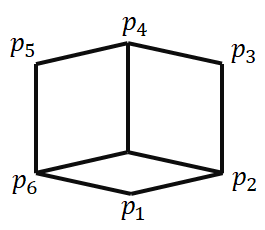

In [3]:
import sympy as sp
from IPython.display import display

# 変数宣言
p1 = sp.Matrix([-1, -1, -1])
p2 = sp.Matrix([+1, -1, -1])
p3 = sp.Matrix([+1, +1, -1])
p4 = sp.Matrix([+1, +1, +1])
p5 = sp.Matrix([-1, +1, +1])
p6 = sp.Matrix([-1, -1, +1])
p1x = sp.Symbol("p_1_x")
p1y = sp.Symbol("p_1_y")
p2x = sp.Symbol("p_2_x")
p2y = sp.Symbol("p_2_y")
p3x = sp.Symbol("p_3_x")
p3y = sp.Symbol("p_3_y")
p4x = sp.Symbol("p_4_x")
p4y = sp.Symbol("p_4_y")
p5x = sp.Symbol("p_5_x")
p5y = sp.Symbol("p_5_y")
p6x = sp.Symbol("p_6_x")
p6y = sp.Symbol("p_6_y")
f = sp.Symbol("f")

# スクリーン上に投影されるマーカーの各頂点へのベクトル
p1 = sp.Matrix([[p1x],[p1y],[f]])
p2 = sp.Matrix([[p2x],[p2y],[f]])
p3 = sp.Matrix([[p3x],[p3y],[f]])
p4 = sp.Matrix([[p4x],[p4y],[f]])
p5 = sp.Matrix([[p5x],[p5y],[f]])
p6 = sp.Matrix([[p6x],[p6y],[f]])

# スクリーン上に投影されるマーカーの各辺のベクトル
l12 = p2 - p1
l23 = p3 - p2
l34 = p4 - p3
l45 = p5 - p4
l56 = p6 - p5
l61 = p1 - p6

# カメラ中央からマーカーの各辺を通る面の法線ベクトル
m12 = l12.cross(p1)
m23 = l23.cross(p2)
m34 = l34.cross(p3)
m45 = l45.cross(p4)
m56 = l56.cross(p5)
m61 = l61.cross(p6)

# xyz軸の計算
x = m12.cross(m45)
y = m23.cross(m56)
z = m34.cross(m61)

# 式の簡素化
x = sp.simplify(x).subs([
    (sp.simplify((p1x-p2x)*(p4x*(p4y-p5y)-p4y*(p4x-p5x))-(p4x-p5x)*(p1x*(p1y-p2y)-p1y*(p1x-p2x))), sp.Symbol("Ax")),
    (sp.simplify((p1y-p2y)*(p4x*(p4y-p5y)-p4y*(p4x-p5x))-(p4y-p5y)*(p1x*(p1y-p2y)-p1y*(p1x-p2x))), sp.Symbol("Bx")),
    (sp.simplify((p1x-p2x)*(p4y-p5y)-(p1y-p2y)*(p4x-p5x)), sp.Symbol("Cx")),
])
y = sp.simplify(y).subs([
    (sp.simplify((p2x-p3x)*(p5x*(p5y-p6y)-p5y*(p5x-p6x))-(p5x-p6x)*(p2x*(p2y-p3y)-p2y*(p2x-p3x))), sp.Symbol("Ay")),
    (sp.simplify((p2y-p3y)*(p5x*(p5y-p6y)-p5y*(p5x-p6x))-(p5y-p6y)*(p2x*(p2y-p3y)-p2y*(p2x-p3x))), sp.Symbol("By")),
    (sp.simplify((p2x-p3x)*(p5y-p6y)-(p2y-p3y)*(p5x-p6x)), sp.Symbol("Cy")),
])
z = sp.simplify(z).subs([
    (sp.simplify((p3x-p4x)*(p6x*(p6y-p1y)-p6y*(p6x-p1x))-(p6x-p1x)*(p3x*(p3y-p4y)-p3y*(p3x-p4x))), sp.Symbol("Az")),
    (sp.simplify((p3y-p4y)*(p6x*(p6y-p1y)-p6y*(p6x-p1x))-(p6y-p1y)*(p3x*(p3y-p4y)-p3y*(p3x-p4x))), sp.Symbol("Bz")),
    (sp.simplify((p3x-p4x)*(p6y-p1y)-(p3y-p4y)*(p6x-p1x)), sp.Symbol("Cz")),
])

print("x軸ベクトル")
display(x)
print("y軸ベクトル")
display(y)
print("z軸ベクトル")
display(z)

print("x軸ベクトルとy軸ベクトルの内積は0になるはずなので、その条件を元に焦点距離を計算")
sp.solve(x.dot(y), f)[2]
x.dot(y)/sp.sqrt(x.dot(x)*y.dot(y))

x軸ベクトル


Matrix([
[   Ax*f],
[   Bx*f],
[Cx*f**2]])

y軸ベクトル


Matrix([
[   Ay*f],
[   By*f],
[Cy*f**2]])

z軸ベクトル


Matrix([
[   Az*f],
[   Bz*f],
[Cz*f**2]])

x軸ベクトルとy軸ベクトルの内積は0になるはずなので、その条件を元に焦点距離を計算


(Ax*Ay*f**2 + Bx*By*f**2 + Cx*Cy*f**4)/sqrt((Ax**2*f**2 + Bx**2*f**2 + Cx**2*f**4)*(Ay**2*f**2 + By**2*f**2 + Cy**2*f**4))